In [2]:
import torch
import numpy as np
from librosa import hz_to_midi, midi_to_hz

In [15]:

def musical_filterbank(
    *,
    n_bands: int,
    fs: int = 44100,
    f_min: float= None,
    f_max: float = None,
    n_freqs: int = 1025,
    octave_per_band_mult: float = 1.0,
) -> torch.Tensor:
    """
    Generate a musical filterbank.

    Args:
        n_bands (int): Number of musical bands.
        fs (int): Sampling frequency.
        f_min (float): Minimum frequency.
        f_max (float): Maximum frequency.
        n_freqs (int): Number of frequency bins.

    Returns:
        torch.Tensor: Filterbank tensor of shape (n_bands, n_freqs).
    """
    nfft = 2 * (n_freqs - 1)
    df = fs / nfft
    f_max = f_max or fs / 2
    f_min = f_min or fs / nfft

    n_octaves = np.log2(f_max / f_min)
    n_octaves_per_band = n_octaves / n_bands
    bandwidth_mult = np.power(2.0, n_octaves_per_band * octave_per_band_mult)

    low_midi = max(0, hz_to_midi(f_min))
    high_midi = hz_to_midi(f_max)
    midi_points = np.linspace(low_midi, high_midi, n_bands)
    hz_pts = midi_to_hz(midi_points)

    low_pts = hz_pts / bandwidth_mult
    high_pts = hz_pts * bandwidth_mult

    low_bins = np.floor(low_pts / df).astype(int)
    high_bins = np.ceil(high_pts / df).astype(int)

    low_bins[0] = 0
    high_bins[-1] = n_freqs - 1

    fb = np.zeros((n_bands, n_freqs))

    for i in range(n_bands):
        fb[i, low_bins[i] : high_bins[i] + 1] = 1.0

    fb[0, : low_bins[0]] = 1.0
    fb[-1, high_bins[-1] + 1 :] = 1.0

    return torch.as_tensor(fb)

In [48]:
mus64_standard = musical_filterbank(n_bands=64)
mus64_narrow = musical_filterbank(n_bands=64, octave_per_band_mult=0.5)
mus64_narrow2 = musical_filterbank(n_bands=64, octave_per_band_mult=0.75)
mus64_wide = musical_filterbank(n_bands=64, octave_per_band_mult=1.5)
mus64_wide2 = musical_filterbank(n_bands=64, octave_per_band_mult=1.25)

/tmp/ipykernel_766831/893133348.py:5: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  ax[0].plot(freqs, mus64_standard.T * (np.arange(64) % 8 + 1).reshape(1, -1))
/tmp/ipykernel_766831/893133348.py:6: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  ax[1].plot(freqs, mus64_narrow.T  * (np.arange(64) % 8 + 1).reshape(1, -1))
/tmp/ipykernel_766831/893133348.py:7: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  ax[2].plot(freqs, mus64_wide.T  * (np.arange(64) % 8 + 1).reshape(1, -1))
/tmp/ipykernel_766831/893133348.py:8: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  ax[3].plot(freqs, mus64_wide2.T  * (np.arange(64) % 8 + 1).reshape(1,

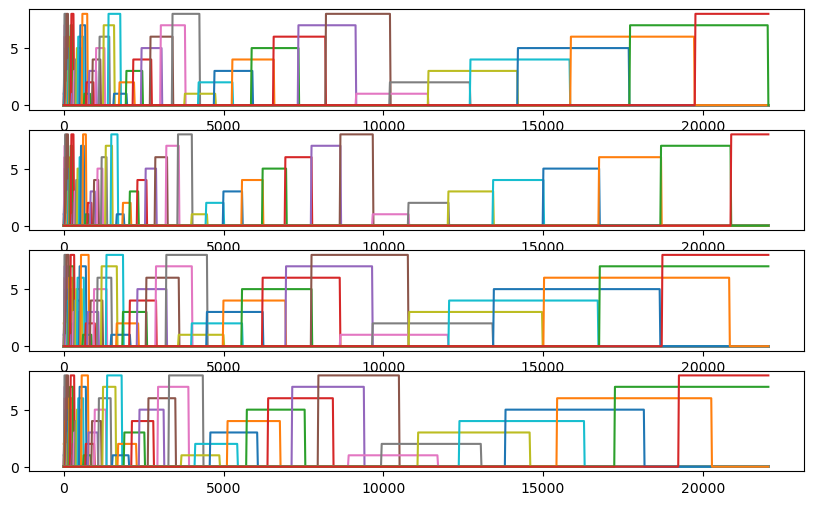

In [56]:
from matplotlib import pyplot as plt

f, ax = plt.subplots(4, 1, figsize=(10, 6))
freqs = np.arange(1025) * 44100 / 2048
ax[0].plot(freqs, mus64_standard.T * (np.arange(64) % 8 + 1).reshape(1, -1))
ax[1].plot(freqs, mus64_narrow.T  * (np.arange(64) % 8 + 1).reshape(1, -1))
ax[2].plot(freqs, mus64_wide.T  * (np.arange(64) % 8 + 1).reshape(1, -1))
ax[3].plot(freqs, mus64_wide2.T  * (np.arange(64) % 8 + 1).reshape(1, -1))

plt.show()


In [55]:
mus64_narrow2.sum(axis=0)[50:].mean()

tensor(1.5344, dtype=torch.float64)

In [23]:
mus64_standard.shape

torch.Size([64, 1025])